In [1]:
#import the required libraries
import numpy as np
import pandas as pd

In [2]:
#import dataset
data = pd.read_csv('twitter_reviews.csv')

In [3]:
data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [4]:
data.tail()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies
24782,25296,3,0,0,3,2,~~Ruffled | Ntac Eileen Dahlia - Beautiful col...


In [5]:
#checking for null values
data.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [6]:
#know more about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [7]:
data.describe()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


In [8]:
data

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [9]:
#create target column
data['Labels']=data['class'].map({0: 'Hate',
                                 1: 'offensive',
                                 2: 'No Hate'})

In [10]:
data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,Labels
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,No Hate
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,offensive
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,offensive
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,offensive
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,offensive


In [11]:
#selectecting required features
data = data[['tweet', 'Labels']]

In [12]:
data

,tweet,Labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,No Hate
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,offensive
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,offensive
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,offensive
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,offensive
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,offensive
24779,"you've gone and broke the wrong heart baby, an...",No Hate
24780,young buck wanna eat!!.. dat nigguh like I ain...,offensive
24781,youu got wild bitches tellin you lies,offensive


In [13]:
#Libraries for data cleaning
import re
import nltk
import string

In [14]:
#importing the stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Chanakya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))

In [16]:
#import stemming
stemmer = nltk.SnowballStemmer('english')

In [17]:
#Data Cleaning 
def clean_data(text):
  #transforming the text to lowercase
  text = str(text).lower()
  #removing website links
  text = re.sub('https?://\S+|www\.S+', '', text)
  #removing other symbols
  text = re.sub('\[.*?\]', '', text)
  #removing image links mentioned within '<>'
  text = re.sub('<.*?>+', '', text)
  #removing escape characters
  text = re.sub('[%s]' %re.escape(string.punctuation), '', text)
  text = re.sub('\n', '', text)
  text = re.sub('\w*\d\w*', '', text)
  #performing tokenisation if the word is not a stop word
  text = [word for word in text.split(' ') if word not in stopwords]
  text = " ".join(text)
  #stemming the text
  text = [stemmer.stem(word) for word in text.split(" ")]
  text = " ".join(text)
  return text

In [18]:
#performing cleaning on reviews 
data['tweet']=data['tweet'].apply(clean_data)

C:\Users\Chanakya\AppData\Local\Temp/ipykernel_11744/4103963214.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tweet']=data['tweet'].apply(clean_data)


In [19]:
data['tweet'].head()

0     rt mayasolov woman shouldnt complain clean ho...
1     rt  boy dat coldtyga dwn bad cuffin dat hoe  ...
2     rt urkindofbrand dawg rt  ever fuck bitch sta...
3               rt cganderson vivabas look like tranni
4     rt shenikarobert shit hear might true might f...
Name: tweet, dtype: object

In [20]:
#converting data into numpy array
x = np.array(data["tweet"])
y = np.array(data["Labels"])

In [21]:
x

array([' rt mayasolov woman shouldnt complain clean hous amp man alway take trash',
       ' rt  boy dat coldtyga dwn bad cuffin dat hoe  place',
       ' rt urkindofbrand dawg rt  ever fuck bitch start cri confus shit',
       ..., 'young buck wanna eat dat nigguh like aint fuckin dis',
       'youu got wild bitch tellin lie',
       'ruffl  ntac eileen dahlia  beauti color combin pink orang yellow amp white coll '],
      dtype=object)

In [22]:
#importing necessary libraries for data transformation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [23]:
cv=CountVectorizer()
x=cv.fit_transform(x)

In [24]:
x

<24783x25693 sparse matrix of type '<class 'numpy.int64'>'
	with 197861 stored elements in Compressed Sparse Row format>

In [25]:
#splitting the dataset for testing and training
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state= 40)

In [26]:
x_train.shape

(16604, 25693)

In [27]:
x_test.shape

(8179, 25693)

In [28]:
#importing Machine Learning model
from sklearn.tree import DecisionTreeClassifier

In [29]:
Dec_Tree = DecisionTreeClassifier()
Dec_Tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [30]:
#predicting on test data
y_pred = Dec_Tree.predict(x_test)

In [31]:
#viewing the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 169,   39,  242],
       [  27, 1126,  243],
       [ 232,  179, 5922]], dtype=int64)

<AxesSubplot:>

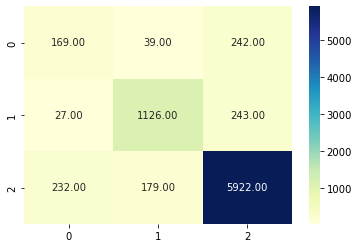

In [32]:
#visualisation of comfusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot = True, fmt = ".2f", cmap = "YlGnBu")

In [33]:
#checking the accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8823817092554102

In [34]:
#sample data
sample = "...Son of a bitch took my Tic Tacs."

In [35]:
#performing data cleaning steps on sample data
clean_sample=clean_data(sample)

In [36]:
clean_sample

'son bitch took tic tac'

In [37]:
#transforming the data
sample_data = cv.transform([clean_sample]).toarray()

In [38]:
sample_data

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [39]:
#predicting on the sample text
sample_pred = Dec_Tree.predict(sample_data)

In [40]:
print("Tweet:", sample)
print("Speech Detection: ", sample_pred[0])

Tweet: ...Son of a bitch took my Tic Tacs.
Speech Detection:  offensive
